In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('wine.csv')

Exploratory Data Analysis (EDA)

In [ ]:
print(data.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [ ]:
print(data.describe())


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [ ]:
# Check for missing values
print(data.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


Examine Feature Distributions


Histograms:


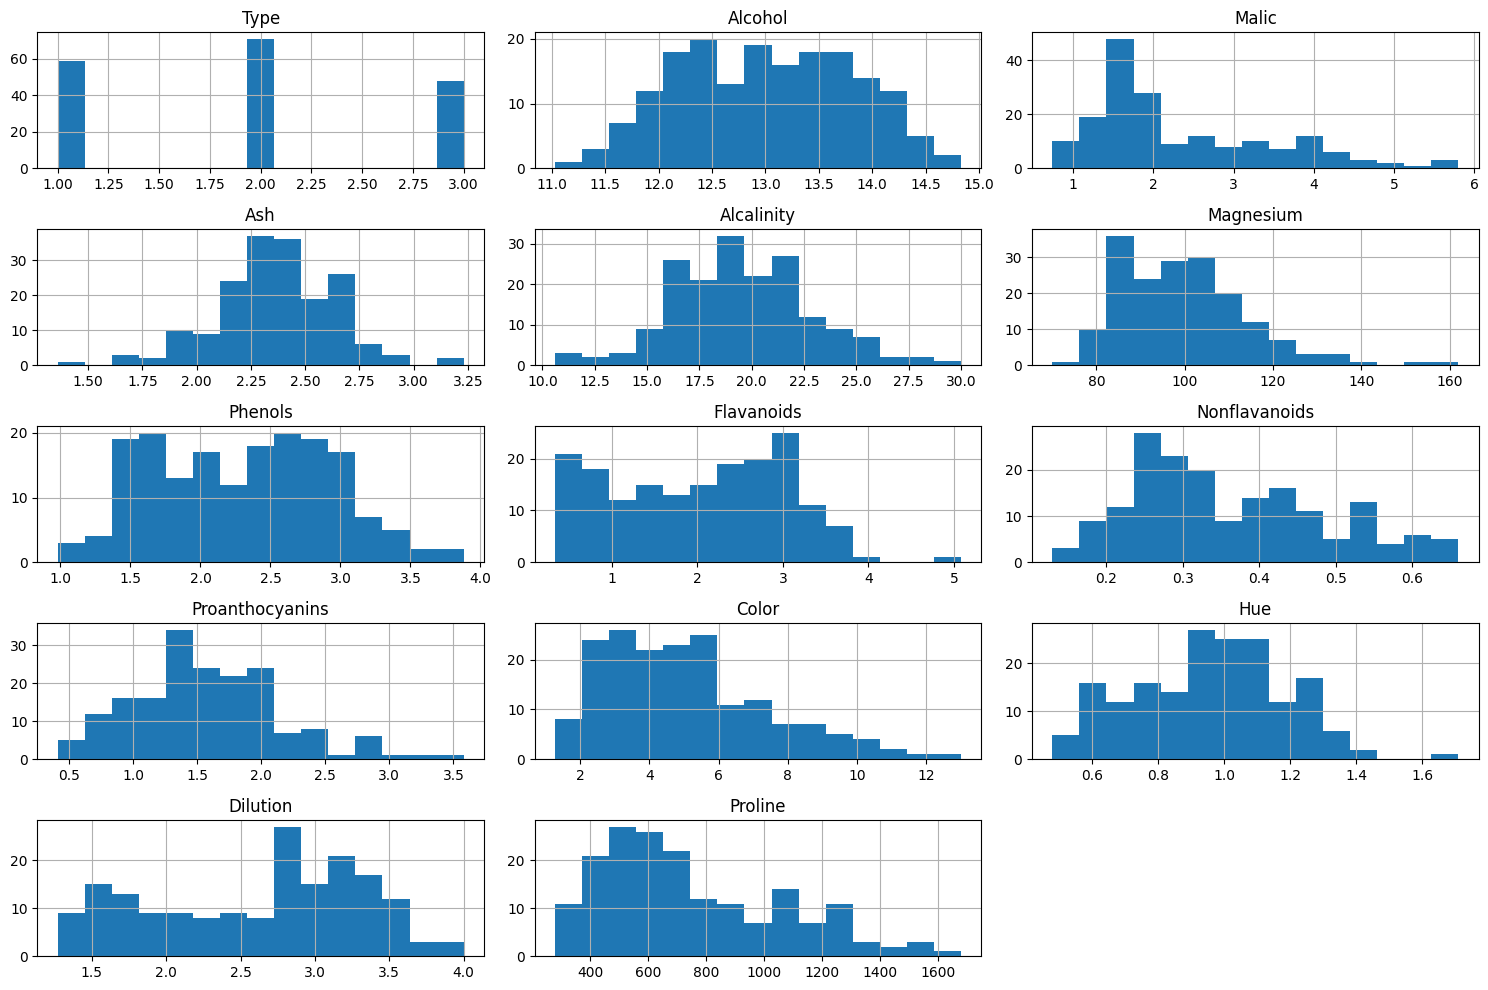

In [ ]:
# Histograms
print("\nHistograms:")
data.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()


Box Plots:


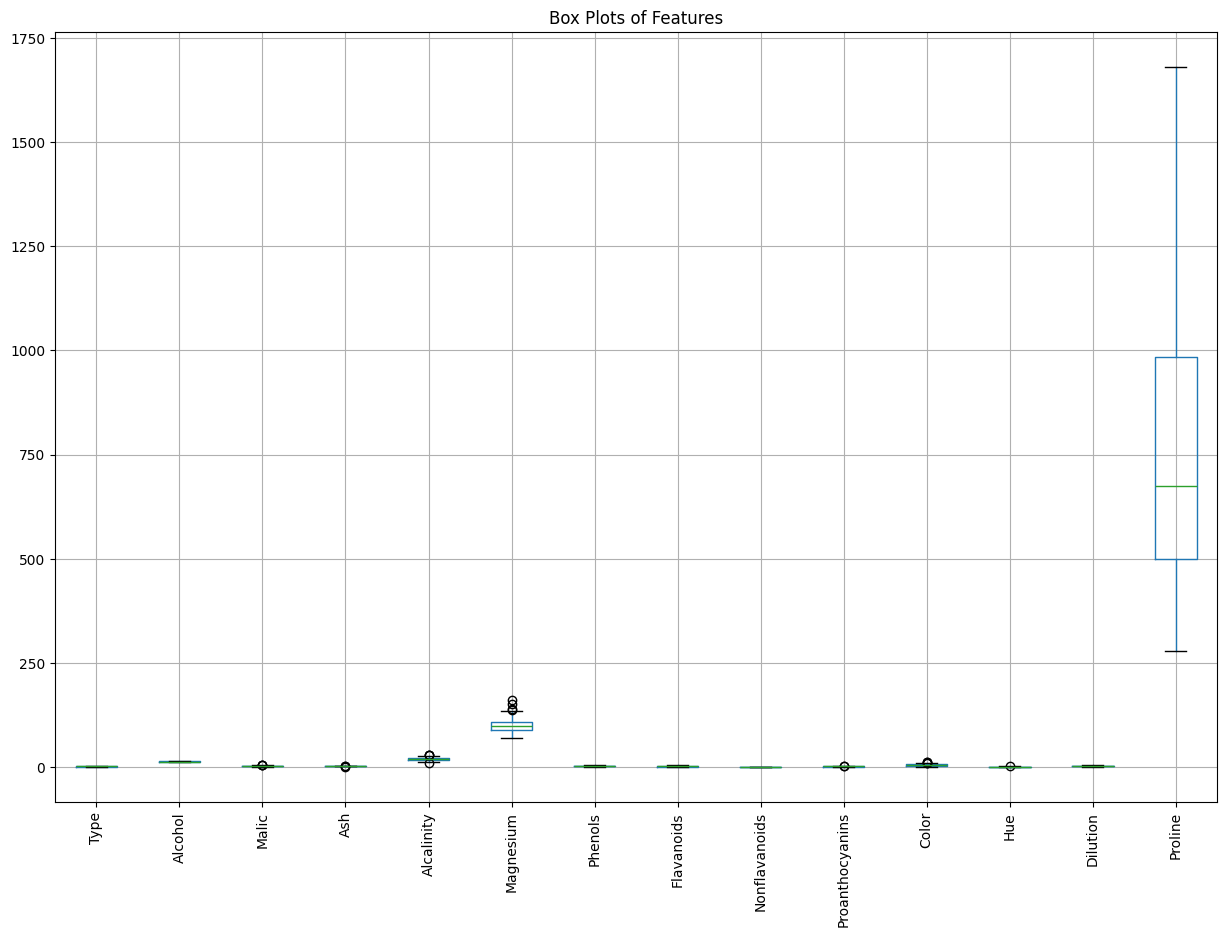

In [ ]:
# Box plots
print("\nBox Plots:")
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots of Features")
plt.show()



Density Plots:


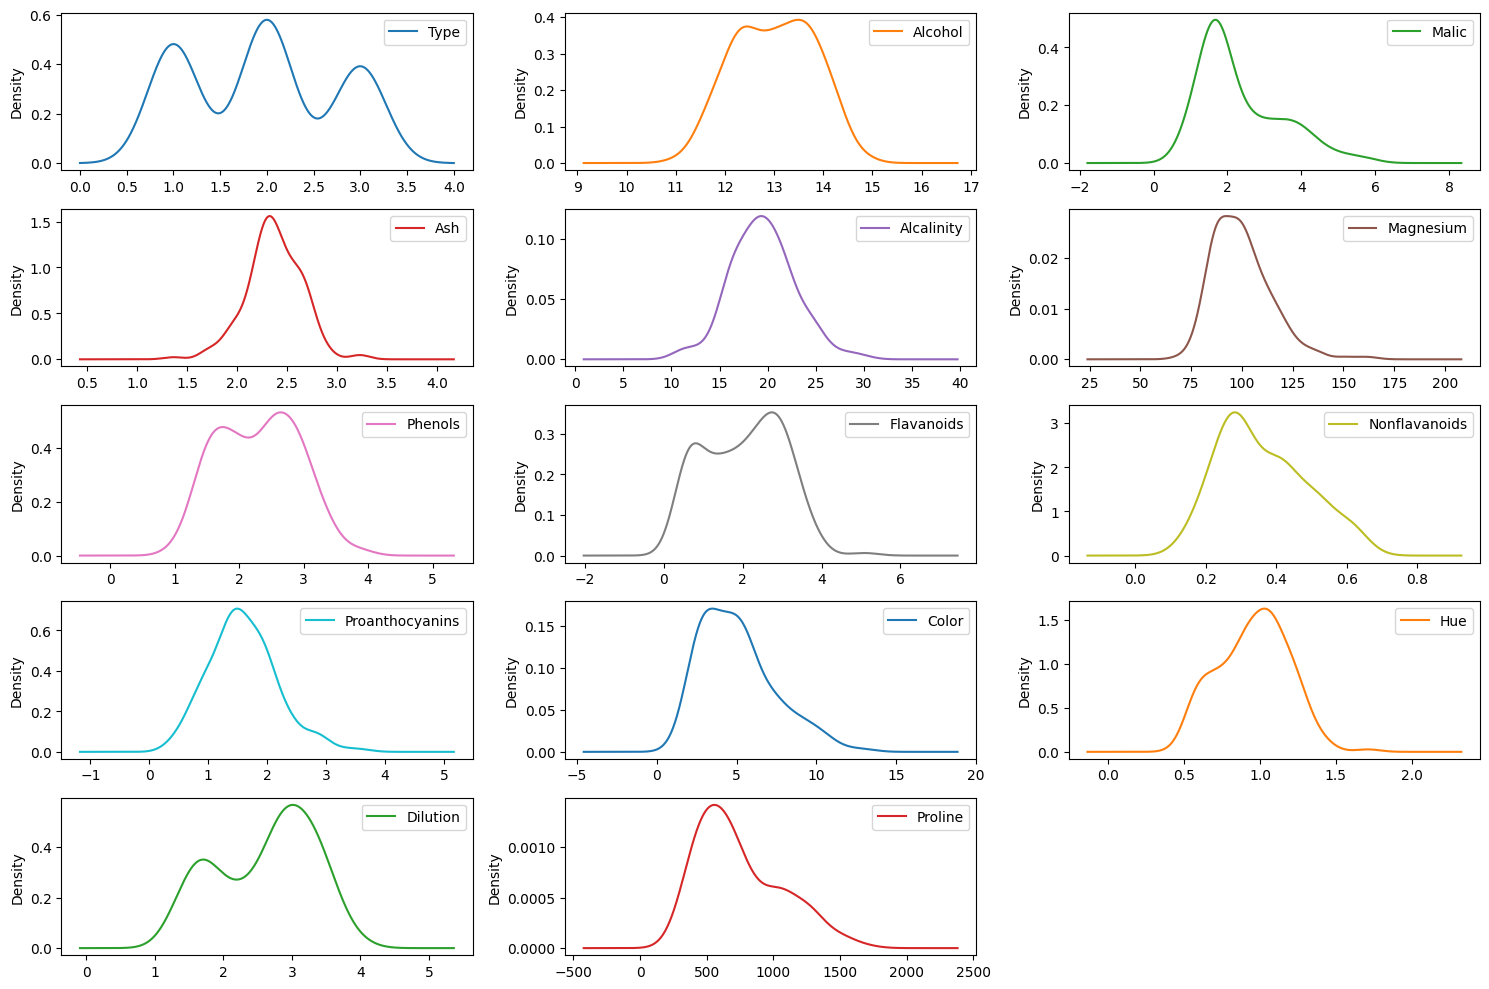

In [ ]:
# Density plots
print("\nDensity Plots:")
data.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

Correlation matrix

In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)


Correlation Matrix:
                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911 

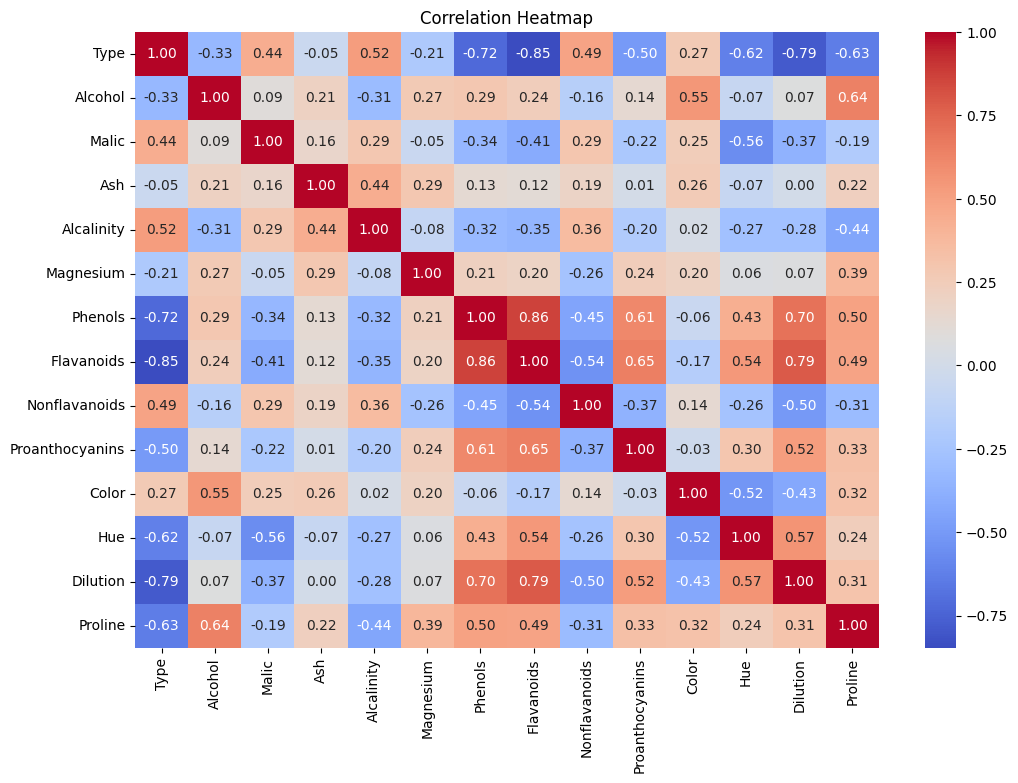

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Pairplot:


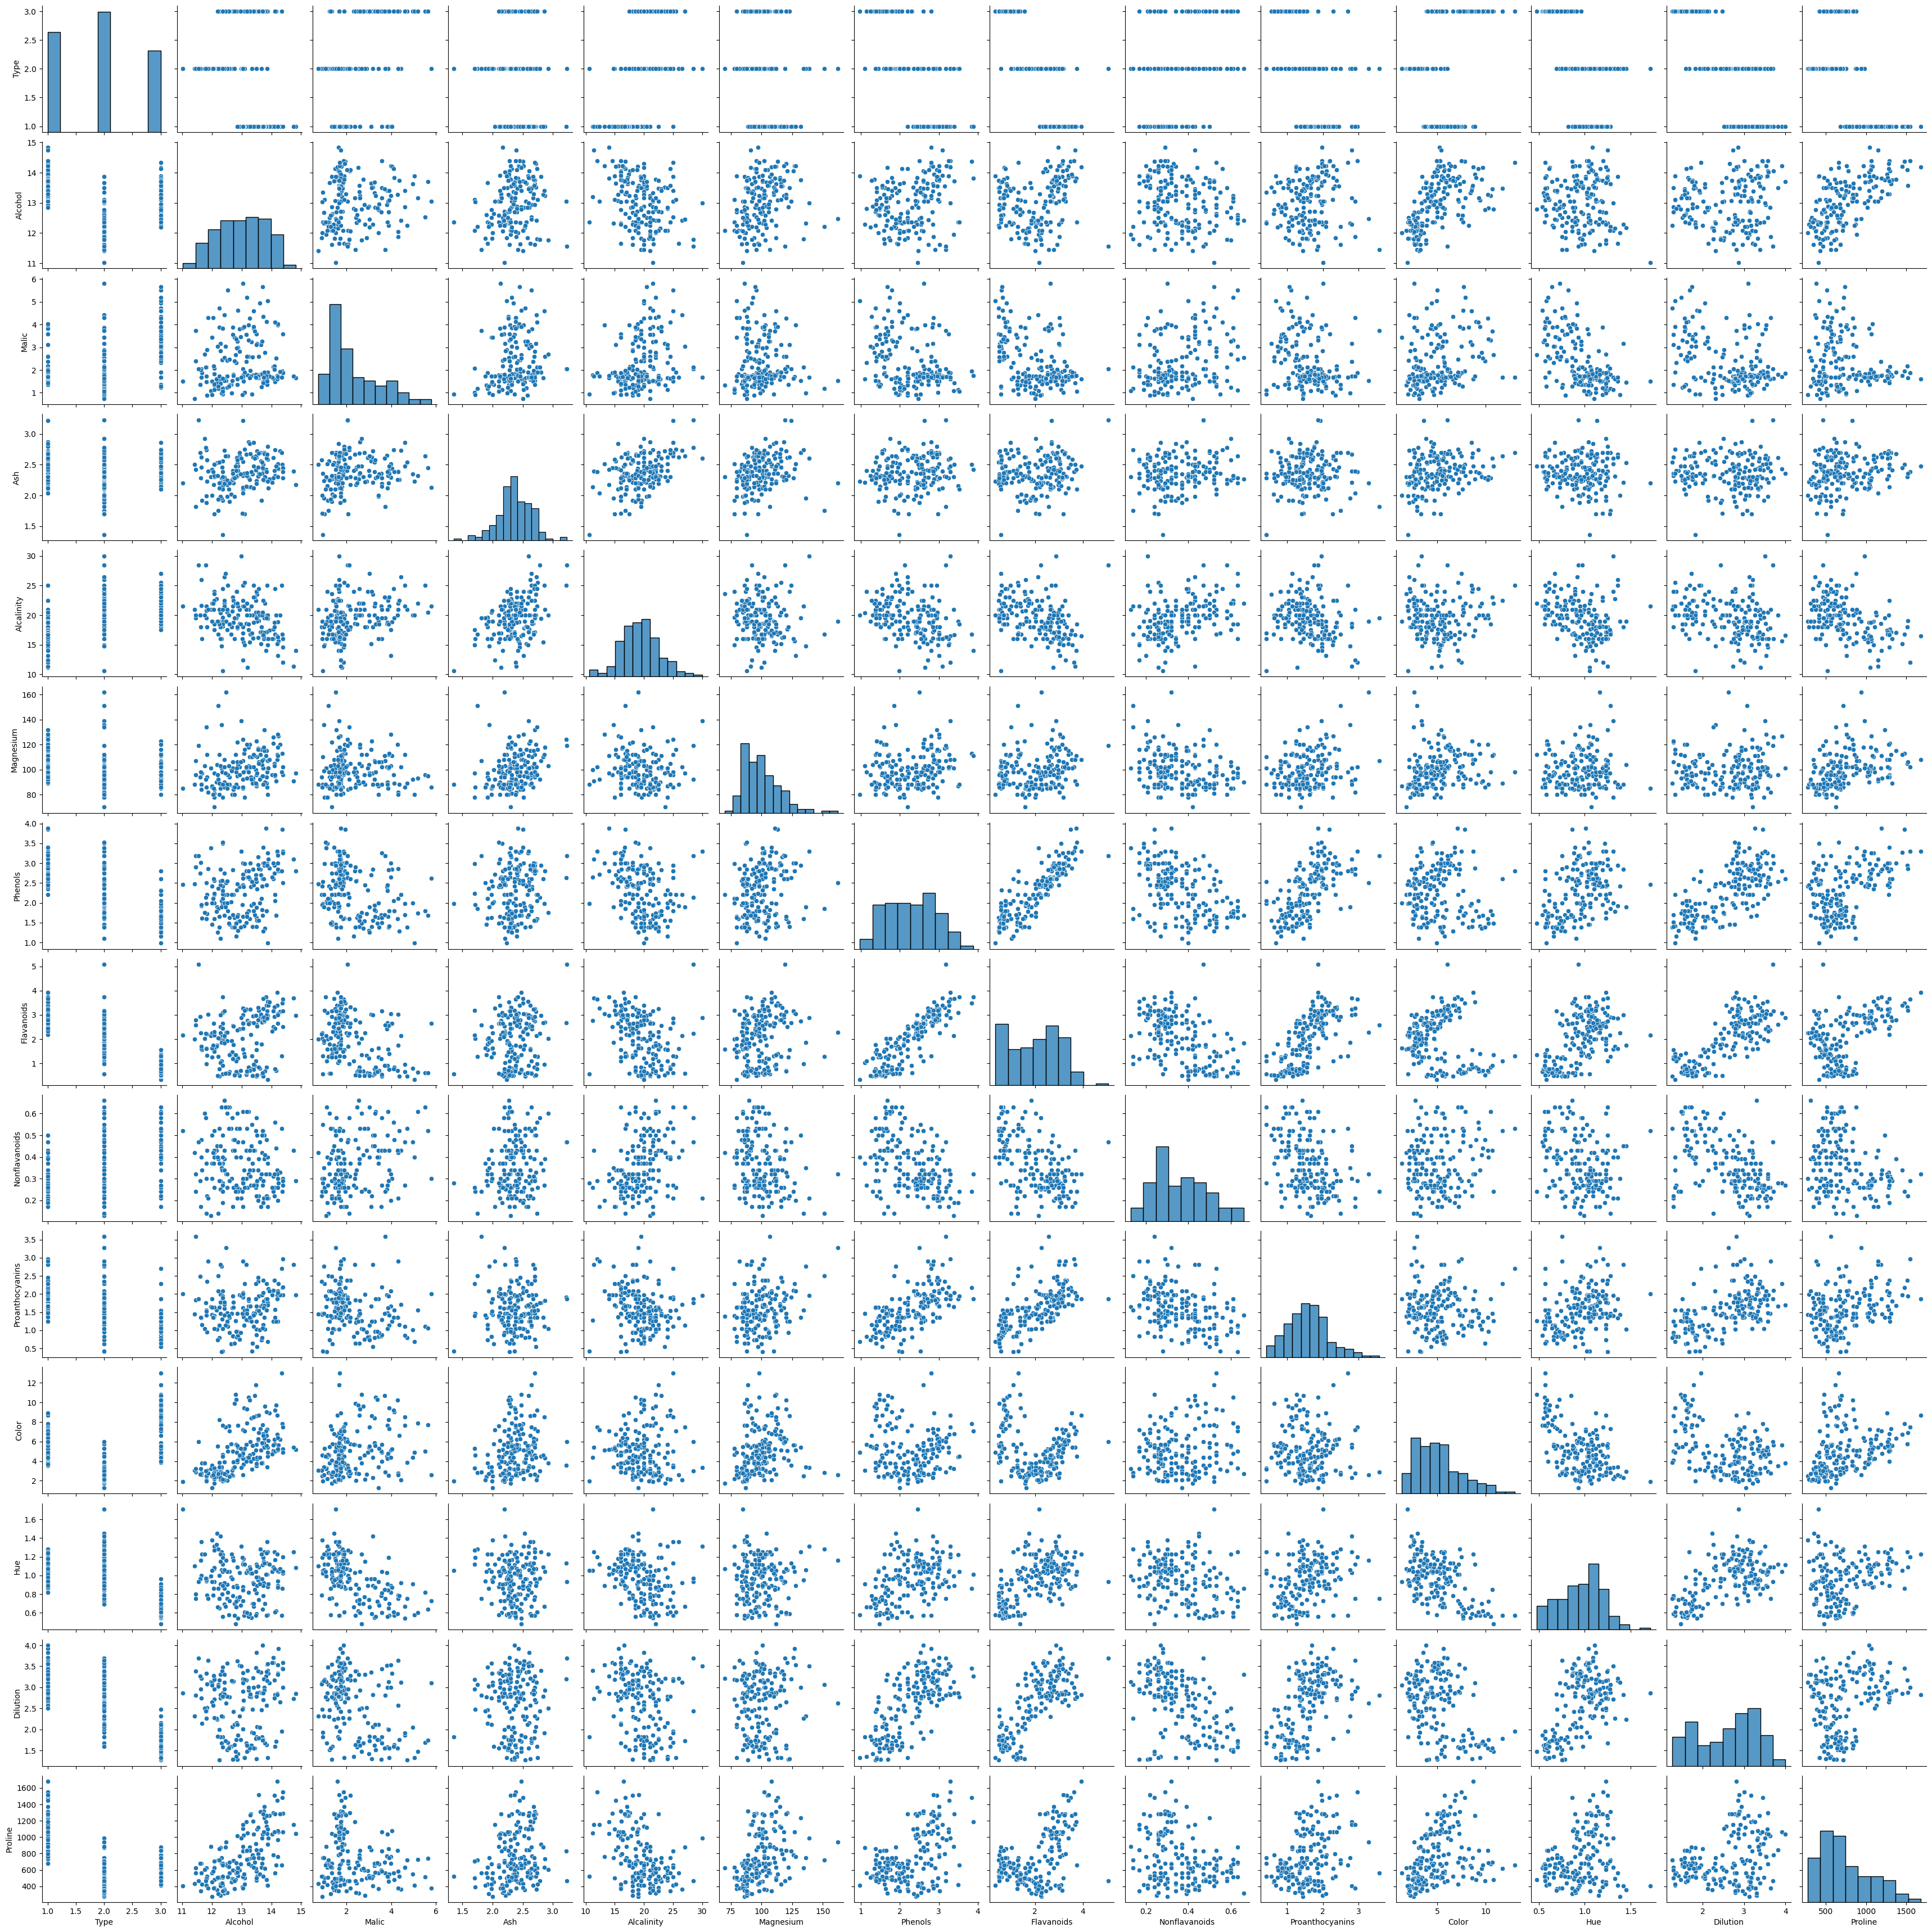

In [ ]:
# Pairplot to visualize relationships
print("\nPairplot:")
sns.pairplot(data)
plt.show()


Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features and labels
X = data.drop('Type', axis=1)
y = data['Type']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Implement PCA
pca = PCA()
pca.fit(X_scaled)


PCA()

In [ ]:
# Scree plot to determine the optimal number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

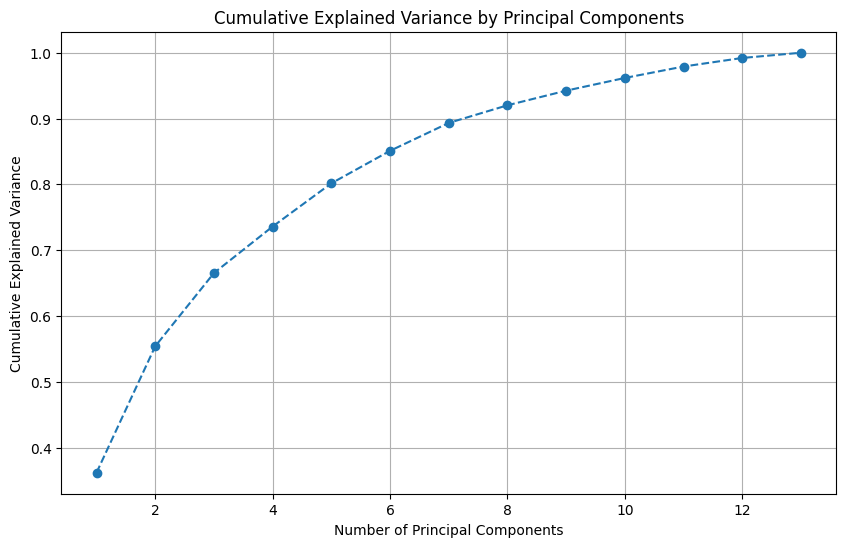

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
# Optimal number of components
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 10


In [ ]:
# Transform the dataset using the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_scaled)


In [ ]:
# Display the shape of the transformed dataset
print(f"Shape of the dataset after PCA transformation: {X_pca.shape}")

Shape of the dataset after PCA transformation: (178, 10)


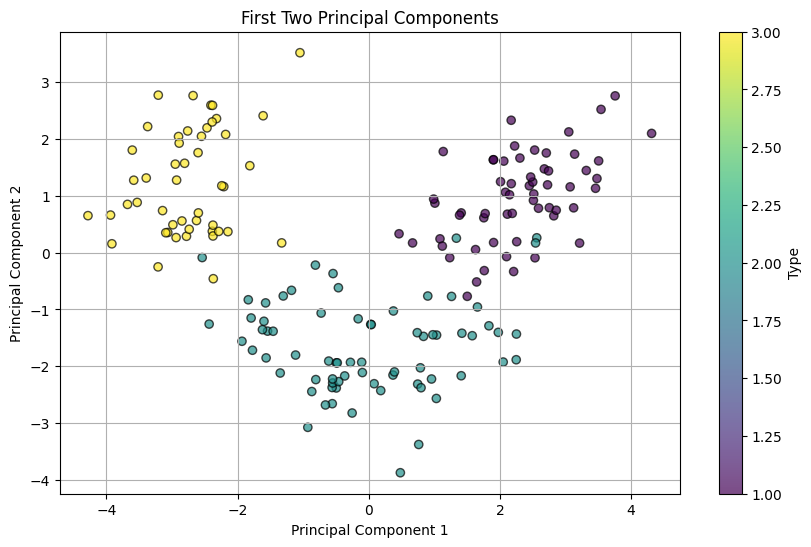

In [ ]:
# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Type')
plt.grid()
plt.show()


Clustering with Original Data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

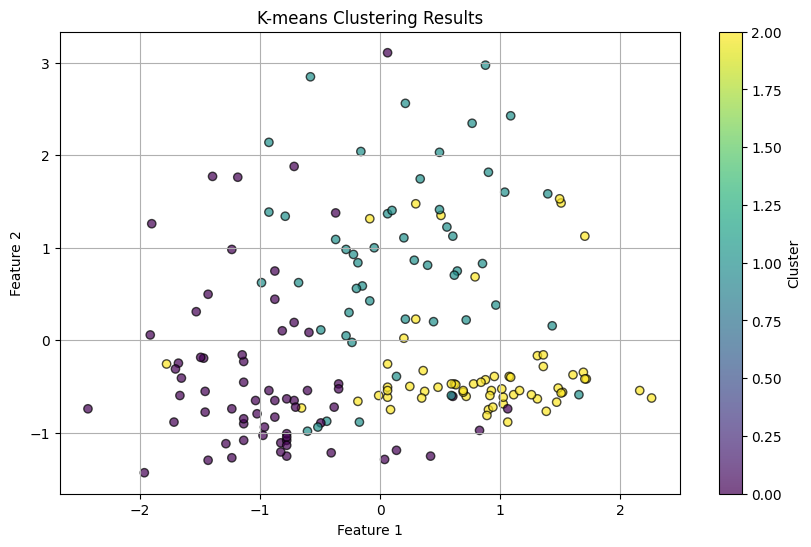

In [ ]:
# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

In [ ]:
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

Silhouette Score: 0.285
Davies-Bouldin Index: 1.389


Clustering with PCA Data

In [ ]:
# Apply K-means clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans.fit_predict(X_pca)

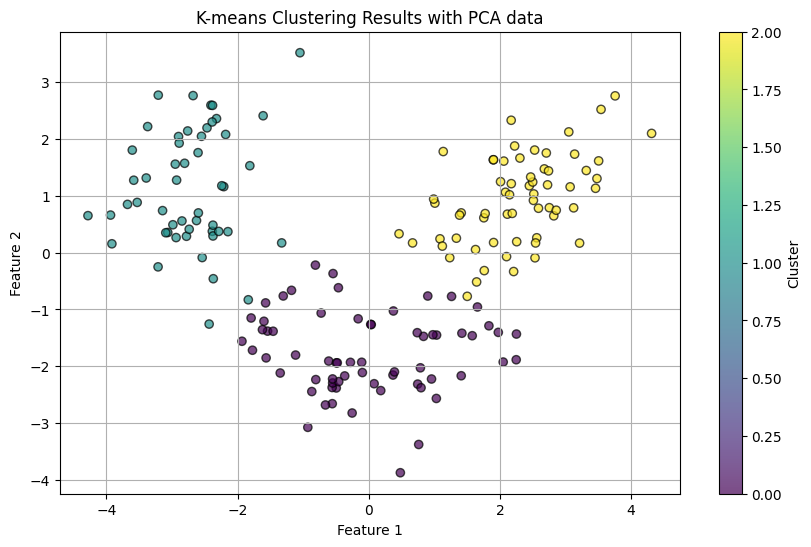

In [ ]:
# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('K-means Clustering Results with PCA data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

Comparison and Analysis

1. Comparison of Clustering Results from the Original Dataset and PCA-Transformed Data

When comparing the clustering results obtained from the original dataset and the PCA-transformed data, we observe that the clusters in the PCA-transformed data are much more distinct and well-defined. In the original high-dimensional space, the clusters were somewhat dispersed, with overlapping boundaries, making it harder to separate the groups clearly. However, after applying PCA, the dimensionality was reduced, and the data was projected onto the most significant principal components, which captured the key variance in the data. As a result, the clusters in the PCA-transformed data were more clearly separated, indicating that PCA helped to highlight the underlying structure.

2. Discussion of Similarities or Differences Observed in the Clustering Results


Similarities:

Both the original dataset and the PCA-transformed data show a similar overall structure in terms of grouping the data points into distinct clusters. The fundamental relationships between the data points remained intact after applying PCA.
The general pattern of clusters is maintained, meaning that the algorithm identified the same groups in both cases, albeit with some differences in their separation.


Differences:

Clarity of Clusters: The most noticeable difference is that the clusters in the PCA-transformed data are much more defined. The separation between the clusters is clearer, and there is less overlap between them, which suggests that PCA successfully removed noise and irrelevant features.
Cluster Boundaries: In the original dataset, clusters were more scattered and not as distinct, possibly due to the presence of less important features or noise. In contrast, PCA emphasized the most important features, leading to better-defined clusters.

3. Reflection on the Impact of Dimensionality Reduction on Clustering Performance


Dimensionality reduction through PCA had a positive impact on clustering performance. By reducing the number of dimensions from 14 to 10, PCA helped to focus on the most significant features that capture the variance in the data. This reduction in complexity allowed the clustering algorithm to work more efficiently and effectively. The clearer separation of clusters after applying PCA indicates that the algorithm was better able to group similar data points together. The reduction also helped in eliminating noise and irrelevant features, which might have contributed to less effective clustering in the original high-dimensional space.

4. Analysis of Trade-offs Between Using PCA and Clustering Directly on the Original Dataset

The trade-offs between using PCA and clustering directly on the original dataset come down to balancing dimensionality reduction and information retention.

PCA offers the advantage of reducing the complexity of the data, improving computational efficiency, and making the clusters more distinct by focusing on the most important features. However, this comes at the cost of potentially losing some subtle but important information that could influence the clustering results. In cases where the data contains noise or irrelevant features, PCA can help to remove these, improving the clustering process.

Clustering on the original dataset, on the other hand, retains all the features, ensuring that no information is discarded. This can be beneficial if every feature is important for clustering. However, it also comes with the disadvantage of higher computational costs and the risk of overfitting due to noise or irrelevant features, which may lead to less meaningful clusters.